In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
city_data_df = pd.read_csv('city_data.csv')

In [5]:
ride_data_df = pd.read_csv('ride_data.csv')

In [6]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [7]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [8]:
sum(city_data_df['type']=='Urban')

66

In [9]:
pyber_data_df = pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])

In [10]:
total_rides = pyber_data_df.groupby(['type'])['ride_id'].count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [11]:
total_drivers = city_data_df.groupby(['type']).sum()['driver_count']
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [12]:
total_fares= pyber_data_df.groupby(['type'])['fare'].sum()
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [13]:
# Get the average fare per die for all the city type
avg_fare_per_ride = total_fares/total_rides


In [14]:
#Get the average fare per dirver for all city types
avg_fare_per_driver = total_fares / total_drivers

In [15]:
pyber_summary_df = pd.DataFrame({
    'Total Rides': total_rides,
    'Total Drivers': total_drivers,
    'Total Fares': total_fares,
    'Average Fare Per Ride': avg_fare_per_ride,
    'Average Fare Per Driver': avg_fare_per_driver
})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [16]:
# Format the summary
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)

In [17]:
pyber_summary_df['Average Fare Per Ride'] = pyber_summary_df['Average Fare Per Ride'].map("${:,.2f}".format)

In [18]:
pyber_summary_df['Average Fare Per Driver'] = pyber_summary_df['Average Fare Per Driver'].map('${:,.2f}'.format)

In [19]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [20]:
# Rename the merged df columns
pyber_data_df.rename(columns = {'city': 'City', 'date':'Date',
                                'fare':'Fare', 'ride_id': 'Ride Id',
                                'driver_count': 'No. Drivers', 
                                'type':'City Type'}, inplace = True)

# Set index of 'Date'
pyber_data_df.set_index('Date', inplace = True)
pyber_data_df.head(5)

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [21]:
# Create new df for fares date
fares_by_date = pyber_data_df[["City Type","Fare"]].copy()

#set index as datatime
fares_by_date.index = pd.to_datetime(fares_by_date.index)

In [22]:
# Calculate the sum() of fares by the type of city and date using groupby() to create a new DataFrame.
total_fares_by_date = fares_by_date.groupby(['City Type','Date']).sum()
total_fares_by_date

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [23]:
#Reset the index
total_fares_by_date.reset_index()

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [24]:
# Create a pivot table DataFrame with the Date as the index and columns = 'City Type' with the Fare for each Date in each row. Note: There will be NaNs in some rows, which will be taken care of when you sum based on the date.
fares_pivot_table = pd.pivot_table(total_fares_by_date, index =['Date'],columns=['City Type'])
fares_pivot_table

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [25]:
#Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc 
fares_by_date = fares_pivot_table.loc['2019-01-01':'2019-04-28']
fares_by_date

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [26]:
# Create a new DataFrame by setting the DataFrame you created in Step 11 with resample() in weekly bins, and calculate the sum() of the fares for each week.
weekly_fares_by_date = fares_by_date.resample('w').sum()
weekly_fares_by_date

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

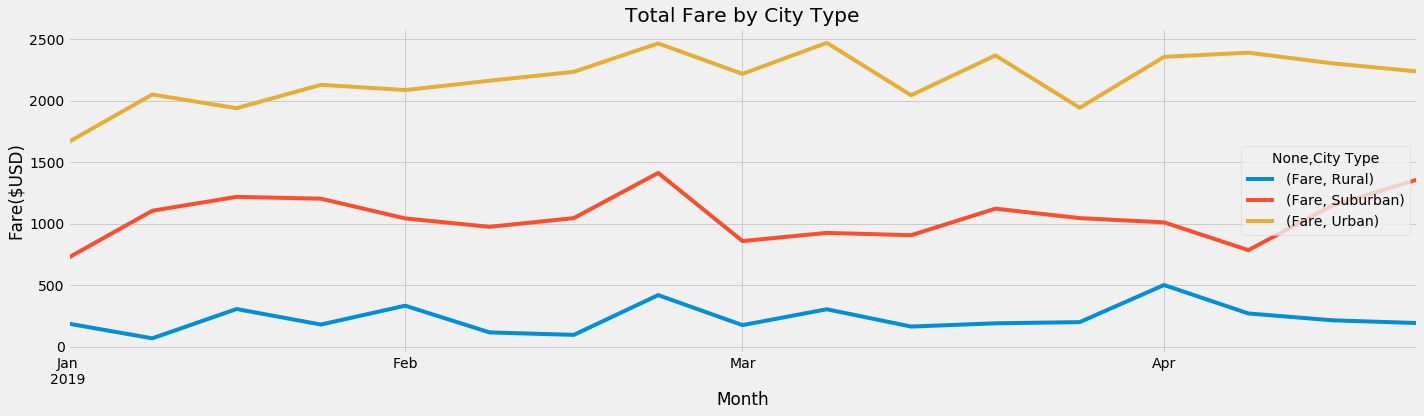

In [27]:
# Import the style from Matplotlib
import matplotlib.pyplot as plt
#Use the graph style fivethirtyeight
plt.style.use('fivethirtyeight')
weekly_fares_by_date.plot(kind ='line',title='Total Fare by City Type', figsize=(20,6))
plt.xlabel("Month")
plt.ylabel("Fare($USD)")

#save the figure
plt.tight_layout()
plt.savefig('challenge_figure.png')

plt.show()